In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
# Data generators with rescaling
train_datagen_with_aug = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/Users/hardikchhipa/Desktop/DR-Arvind/Aravind eye dataset/aptos2019-blindness-detection/train_split',
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/Users/hardikchhipa/Desktop/DR-Arvind/Aravind eye dataset/aptos2019-blindness-detection/train_split',
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3298 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [4]:
# Functional API for building the model
input_img = Input(shape=(224, 224, 3))
MobileNetV2_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_img)

# Freeze layers in DenseNet121
for layer in MobileNetV2_model.layers:
    layer.trainable = False

# Add custom layers on top of DenseNet121
x = Flatten()(MobileNetV2_model.output)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
output = Dense(5, activation='softmax')(x)

# Construct the model
model = Model(inputs=input_img, outputs=output)

# Summary of the model
# model.summary()

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m, f1_m])

# Train the model
graph = model.fit(train_generator, epochs=25, validation_data=validation_generator)

# Save the model
model.save("/Users/hardikchhipa/Desktop/DR-Arvind/saved_models/used_models/MobileNetV2_model.h5")

# Print the results
print(graph.history)

/var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/ipykernel_68989/4146345780.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNetV2_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_img)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-06 00:34:39.990220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 00:34:51.034259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.6061 - f1_m: 0.6069 - loss: 10.3637 - precision_m: 0.6124 - recall_m: 0.6026 - val_accuracy: 0.7363 - val_f1_m: 0.7308 - val_loss: 0.8513 - val_precision_m: 0.7617 - val_recall_m: 0.7031
Epoch 2/25


2024-09-06 00:40:11.305683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 00:40:22.772476: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.7455 - f1_m: 0.7404 - loss: 0.7988 - precision_m: 0.7619 - recall_m: 0.7207 - val_accuracy: 0.7637 - val_f1_m: 0.7479 - val_loss: 0.7683 - val_precision_m: 0.7819 - val_recall_m: 0.7179
Epoch 3/25


2024-09-06 00:45:30.230555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 00:45:40.131236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.7863 - f1_m: 0.7853 - loss: 0.6410 - precision_m: 0.8222 - recall_m: 0.7537 - val_accuracy: 0.7308 - val_f1_m: 0.7357 - val_loss: 0.8518 - val_precision_m: 0.7898 - val_recall_m: 0.6892
Epoch 4/25


2024-09-06 00:50:53.677719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-06 00:51:00.874348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.8130 - f1_m: 0.8097 - loss: 0.5038 - precision_m: 0.8369 - recall_m: 0.7851 - val_accuracy: 0.7610 - val_f1_m: 0.7650 - val_loss: 0.7446 - val_precision_m: 0.7822 - val_recall_m: 0.7491
Epoch 5/25


2024-09-06 00:56:11.978145: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 00:56:22.012893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.8472 - f1_m: 0.8493 - loss: 0.4601 - precision_m: 0.8720 - recall_m: 0.8290 - val_accuracy: 0.7500 - val_f1_m: 0.7504 - val_loss: 0.8654 - val_precision_m: 0.7626 - val_recall_m: 0.7396
Epoch 6/25


2024-09-06 01:01:32.610113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:01:42.450081: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8409 - f1_m: 0.8404 - loss: 0.5273 - precision_m: 0.8591 - recall_m: 0.8249 - val_accuracy: 0.7692 - val_f1_m: 0.7526 - val_loss: 0.7484 - val_precision_m: 0.7894 - val_recall_m: 0.7222
Epoch 7/25


2024-09-06 01:06:53.205085: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:07:03.201639: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.8664 - f1_m: 0.8658 - loss: 0.3673 - precision_m: 0.8905 - recall_m: 0.8433 - val_accuracy: 0.7665 - val_f1_m: 0.7776 - val_loss: 0.7627 - val_precision_m: 0.8027 - val_recall_m: 0.7543
Epoch 8/25


2024-09-06 01:12:14.213250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-06 01:12:21.830208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.8905 - f1_m: 0.8940 - loss: 0.2899 - precision_m: 0.9082 - recall_m: 0.8808 - val_accuracy: 0.7857 - val_f1_m: 0.7513 - val_loss: 0.8515 - val_precision_m: 0.7828 - val_recall_m: 0.7240
Epoch 9/25


2024-09-06 01:17:29.030916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-06 01:17:36.212885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.9294 - f1_m: 0.9285 - loss: 0.2136 - precision_m: 0.9389 - recall_m: 0.9187 - val_accuracy: 0.7802 - val_f1_m: 0.7834 - val_loss: 0.7447 - val_precision_m: 0.8006 - val_recall_m: 0.7674
Epoch 10/25


2024-09-06 01:22:42.454906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-06 01:22:50.947535: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9093 - f1_m: 0.9127 - loss: 0.2726 - precision_m: 0.9208 - recall_m: 0.9051 - val_accuracy: 0.7775 - val_f1_m: 0.7846 - val_loss: 0.9189 - val_precision_m: 0.7920 - val_recall_m: 0.7778
Epoch 11/25


2024-09-06 01:28:03.572466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:28:12.965509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9381 - f1_m: 0.9364 - loss: 0.1740 - precision_m: 0.9451 - recall_m: 0.9281 - val_accuracy: 0.7885 - val_f1_m: 0.7842 - val_loss: 0.8596 - val_precision_m: 0.7938 - val_recall_m: 0.7752
Epoch 12/25


2024-09-06 01:33:22.693407: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:33:31.693701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9220 - f1_m: 0.9170 - loss: 0.2201 - precision_m: 0.9344 - recall_m: 0.9032 - val_accuracy: 0.7665 - val_f1_m: 0.7666 - val_loss: 0.9285 - val_precision_m: 0.7937 - val_recall_m: 0.7422
Epoch 13/25


2024-09-06 01:38:46.000344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:38:57.199067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.8928 - f1_m: 0.8907 - loss: 0.3261 - precision_m: 0.9044 - recall_m: 0.8779 - val_accuracy: 0.7582 - val_f1_m: 0.7621 - val_loss: 1.0686 - val_precision_m: 0.7869 - val_recall_m: 0.7396
Epoch 14/25


2024-09-06 01:44:13.124497: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:44:24.444638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9199 - f1_m: 0.9199 - loss: 0.2537 - precision_m: 0.9312 - recall_m: 0.9091 - val_accuracy: 0.7885 - val_f1_m: 0.7980 - val_loss: 0.9241 - val_precision_m: 0.8073 - val_recall_m: 0.7891
Epoch 15/25


2024-09-06 01:49:38.982430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:49:47.729139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.9086 - f1_m: 0.9097 - loss: 0.2884 - precision_m: 0.9222 - recall_m: 0.8978 - val_accuracy: 0.7527 - val_f1_m: 0.7511 - val_loss: 1.2110 - val_precision_m: 0.7606 - val_recall_m: 0.7422
Epoch 16/25


2024-09-06 01:55:08.171010: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 01:55:18.720044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9027 - f1_m: 0.9030 - loss: 0.3337 - precision_m: 0.9149 - recall_m: 0.8918 - val_accuracy: 0.7940 - val_f1_m: 0.7959 - val_loss: 0.9004 - val_precision_m: 0.8132 - val_recall_m: 0.7795
Epoch 17/25


2024-09-06 02:00:34.069150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:00:41.613820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9379 - f1_m: 0.9409 - loss: 0.2067 - precision_m: 0.9473 - recall_m: 0.9349 - val_accuracy: 0.7912 - val_f1_m: 0.7960 - val_loss: 0.7977 - val_precision_m: 0.8051 - val_recall_m: 0.7873
Epoch 18/25


2024-09-06 02:06:01.519987: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:06:11.538693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9430 - f1_m: 0.9424 - loss: 0.1758 - precision_m: 0.9506 - recall_m: 0.9346 - val_accuracy: 0.7802 - val_f1_m: 0.7811 - val_loss: 0.8374 - val_precision_m: 0.8035 - val_recall_m: 0.7604
Epoch 19/25


2024-09-06 02:11:27.654980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:11:37.793718: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9518 - f1_m: 0.9510 - loss: 0.1360 - precision_m: 0.9603 - recall_m: 0.9422 - val_accuracy: 0.7720 - val_f1_m: 0.7835 - val_loss: 0.9640 - val_precision_m: 0.7992 - val_recall_m: 0.7691
Epoch 20/25


2024-09-06 02:16:54.847783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:17:05.239618: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.9566 - f1_m: 0.9580 - loss: 0.1397 - precision_m: 0.9631 - recall_m: 0.9532 - val_accuracy: 0.7610 - val_f1_m: 0.7689 - val_loss: 1.2678 - val_precision_m: 0.7760 - val_recall_m: 0.7622
Epoch 21/25


2024-09-06 02:22:22.549130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:22:29.130221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9542 - f1_m: 0.9557 - loss: 0.1455 - precision_m: 0.9591 - recall_m: 0.9524 - val_accuracy: 0.7665 - val_f1_m: 0.7730 - val_loss: 1.1123 - val_precision_m: 0.7854 - val_recall_m: 0.7613
Epoch 22/25


2024-09-06 02:27:49.149051: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:27:58.852739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9497 - f1_m: 0.9488 - loss: 0.1458 - precision_m: 0.9545 - recall_m: 0.9435 - val_accuracy: 0.7857 - val_f1_m: 0.7844 - val_loss: 1.2685 - val_precision_m: 0.7877 - val_recall_m: 0.7812
Epoch 23/25


2024-09-06 02:33:15.746605: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:33:25.521967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.9482 - f1_m: 0.9498 - loss: 0.1502 - precision_m: 0.9543 - recall_m: 0.9455 - val_accuracy: 0.7802 - val_f1_m: 0.7867 - val_loss: 1.1616 - val_precision_m: 0.7961 - val_recall_m: 0.7778
Epoch 24/25


2024-09-06 02:38:45.688308: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:38:55.564560: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9620 - f1_m: 0.9613 - loss: 0.1067 - precision_m: 0.9656 - recall_m: 0.9572 - val_accuracy: 0.7720 - val_f1_m: 0.7786 - val_loss: 1.2011 - val_precision_m: 0.7859 - val_recall_m: 0.7717
Epoch 25/25


2024-09-06 02:44:12.144871: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 02:44:22.767621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.9606 - f1_m: 0.9625 - loss: 0.1350 - precision_m: 0.9657 - recall_m: 0.9595 - val_accuracy: 0.7995 - val_f1_m: 0.7975 - val_loss: 1.2515 - val_precision_m: 0.8017 - val_recall_m: 0.7934


{'accuracy': [0.6622195243835449, 0.7483323216438293, 0.7868404984474182, 0.8101879954338074, 0.8486961722373962, 0.8399029970169067, 0.8684051036834717, 0.8896300792694092, 0.9184353947639465, 0.9214675426483154, 0.9232868552207947, 0.9057004451751709, 0.8944814801216125, 0.9169193506240845, 0.9078229069709778, 0.9120678901672363, 0.9293511509895325, 0.9390539526939392, 0.9517889618873596, 0.957550048828125, 0.9487568140029907, 0.9493632316589355, 0.9526985883712769, 0.9627046585083008, 0.9614918231964111], 'f1_m': [0.6651045680046082, 0.7468475103378296, 0.7843939065933228, 0.8035698533058167, 0.8525065779685974, 0.8400523662567139, 0.870120108127594, 0.8913818001747131, 0.9200738668441772, 0.9232891798019409, 0.9234982132911682, 0.9031184911727905, 0.892638087272644, 0.9180634617805481, 0.9075109958648682, 0.9109297394752502, 0.9300784468650818, 0.9398521780967712, 0.9506837129592896, 0.9577291011810303, 0.9491029977798462, 0.9492059946060181, 0.9542070031166077, 0.9624021053314209,

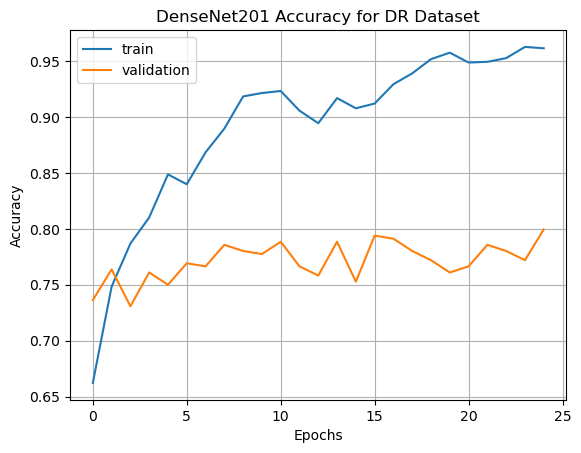

In [5]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Accuracy for DR Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

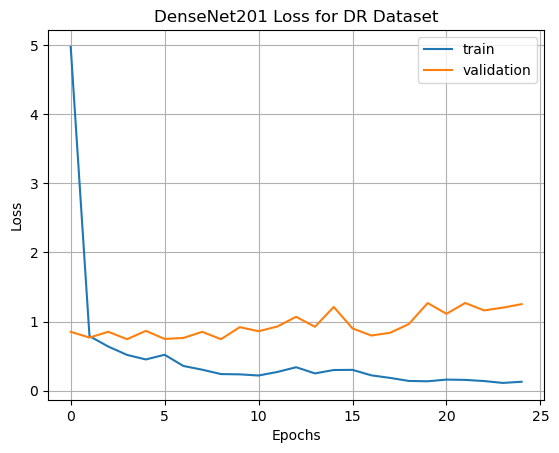

In [6]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Loss for DR Dataset')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()